## 7. Î∂ÑÎ•òÎ•º ÌÜµÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏòàÏ†ú

Î≥∏ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî Îã§ÏñëÌïú Íµ∞ÏßëÎ∂ÑÏÑù Í∏∞Î≤ï Ï§ë ÏúÑÍ≥ÑÏ†Å Íµ∞Ïßë, K-ÌèâÍ∑† Íµ∞Ïßë, DBSCANÏùÑ Ïù¥Ïö©Ìïú Î∂ÑÏÑù ÏòàÏ†úÎ•º ÏÇ¥Ìé¥Î¥ÖÎãàÎã§.

### 7.1. ÏúÑÍ≥ÑÏ†Å Íµ∞Ïßë Î∂ÑÏÑù Hierarchical Clustering Analysis

In [1]:
# Ï§ÄÎπÑÏûëÏóÖ
## ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî©
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
import requests
from io import StringIO
import warnings
warnings.filterwarnings('ignore')
from matplotlib.patches import Patch


from lesson3 import setup_korean_font
setup_korean_font()

np.random.seed(42)

Î≥∏ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî NCIÏùò ÏïîÏÑ∏Ìè¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Ïö©ÌïòÏó¨ Íµ∞ÏßëÎ∂ÑÏÑùÏùÑ ÏßÑÌñâÌï©ÎãàÎã§. Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Íµ¨ÏÑ±Ïóê ÎåÄÌï¥ÏÑú Î≥ÑÎèÑÎ°ú ÌïôÏäµÌï¥Î≥¥ÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.

In [2]:
## Îç∞Ïù¥ÌÑ∞ÏÖã Î∞è ÎùºÎ≤® Î°úÎî©
### ÏÇ¨Ïö©Ïûê Ï†ïÏùòÌï®ÏàòÎ•º ÎßåÎì§ ÎïåÏóê Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Í∂åÏû•ÌïòÎäî Ìï®Ïàò Íµ¨ÏÑ± Î∞©Î≤ïÏûÖÎãàÎã§.
### tryÏôÄ except Íµ¨Î¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∏∞Îä•ÏùÑ Íµ¨ÌòÑÌïòÎäî Í≤ΩÏö∞ Í∑∏Î†áÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ÏôÄ Ïñ¥Îñ§ Ï∞®Ïù¥Í∞Ä ÏûàÏùÑÏßÄÏóê ÎåÄÌï¥ Ìïú Î≤à Í≥†ÎØºÌï¥Î≥¥ÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.

def load_nci_data():
    """
    NCI Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïö¥Î°úÎìúÌïòÍ≥† Î°úÎìúÌï©ÎãàÎã§.
    64Í∞ú Ïïî ÏÑ∏Ìè¨Ï£º x 6830Í∞ú Ïú†Ï†ÑÏûêÏùò Î∞úÌòÑ Îç∞Ïù¥ÌÑ∞
    """
    url = 'https://hastie.su.domains/ElemStatLearn/datasets/nci.data.csv'
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        
        # CSV Îç∞Ïù¥ÌÑ∞ ÏùΩÍ∏∞
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data, index_col=0)
        
        print(f"Ïú†Ï†ÑÏûê Î∞úÌòÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df.shape}")
        
        return df
        
    except Exception as e:
        print(f"Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ïò§Î•ò: {e}")
        print("Ïù∏ÌÑ∞ÎÑ∑ Ïó∞Í≤∞ÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
        return None

def load_nci_labels():
    """
    NCI Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ïïî ÌÉÄÏûÖ ÎùºÎ≤®ÏùÑ Îã§Ïö¥Î°úÎìúÌïòÍ≥† Î°úÎìúÌï©ÎãàÎã§.
    64Í∞ú Ïïî ÏÑ∏Ìè¨Ï£ºÏùò Ïïî Ï¢ÖÎ•ò Ï†ïÎ≥¥
    """
    url = 'https://hastie.su.domains/ElemStatLearn/datasets/nci.label.txt'
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        
        # ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÎùºÏù∏Î≥ÑÎ°ú ÏùΩÍ∏∞
        labels = response.text.strip().split('\n')
        
        print(f"Ïïî ÌÉÄÏûÖ ÎùºÎ≤® Ïàò: {len(labels)}")
        
        return labels
        
    except Exception as e:
        print(f"ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ïò§Î•ò: {e}")
        print("Ïù∏ÌÑ∞ÎÑ∑ Ïó∞Í≤∞ÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
        return None

def clean_labels(labels):
    """
    ÏõêÎç∞Ïù¥ÌÑ∞ ÌååÏùºÏóêÏÑú ÎùºÎ≤®Í∞íÏóê Í≥µÎ∞±Ïù¥ ÏûàÏñ¥ÏÑú Ïù¥Í±∏ Í∑∏ÎåÄÎ°ú Í∞ÄÏ†∏Ïò§Î©¥ ÎèôÏùºÌïú ÎùºÎ≤®ÏùÑ Îã§Î•¥Í≤å Ïù∏ÏãùÌïòÎäî Î¨∏Ï†úÍ∞Ä ÏÉùÍπÅÎãàÎã§.
    Ïù¥ Ìï®ÏàòÏóêÏÑúÎäî ÎùºÎ≤®Í∞í ÏïûÎí§Ïóê ÏûàÎäî Í≥µÎ∞±ÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
    """
    
    # Í≥µÎ∞± Ï†úÍ±∞ Î∞è Í∏∞Î≥∏ Ï†ïÎ¶¨
    cleaned_labels = []
    for label in labels:
        # ÏïûÎí§ Í≥µÎ∞± Ï†úÍ±∞
        cleaned = label.strip()
        cleaned_labels.append(cleaned)
   
    return cleaned_labels

# Îç∞Ïù¥ÌÑ∞ÏôÄ ÎùºÎ≤® Î°úÎî©
nci_data = load_nci_data()
nci_labels_raw = load_nci_labels()

Ïú†Ï†ÑÏûê Î∞úÌòÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (6830, 64)
Ïïî ÌÉÄÏûÖ ÎùºÎ≤® Ïàò: 64
Ïïî ÌÉÄÏûÖ ÎùºÎ≤® Ïàò: 64


In [3]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

## ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞Ïùò Í≥µÎ∞± Ï†úÍ±∞
nci_labels = clean_labels(nci_labels_raw)

## Ï†ÑÏπò
nci_transposed = nci_data.T
print(f"Ï†ÑÏπò ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {nci_transposed.shape} (ÏÉòÌîå √ó Ïú†Ï†ÑÏûê)")
    
## ÌëúÏ§ÄÌôî
scaler = StandardScaler()
nci_scaled = pd.DataFrame(
    scaler.fit_transform(nci_transposed),
    index=nci_transposed.index,
    columns=nci_transposed.columns
)
    
print(f"ÏµúÏ¢Ö Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {nci_scaled.shape}")
    
## Ïïî ÌÉÄÏûÖ ÎùºÎ≤® Ï†ïÎ≥¥ Î∂ÑÏÑù
cancer_type_counts = pd.Series(nci_labels).value_counts()
print(f"Ï¥ù {len(set(nci_labels))}Í∞úÏùò Í≥†Ïú† Ïïî ÌÉÄÏûÖ:")
print(cancer_type_counts)

## ÏÉâÏÉÅ Îß§Ìïë ÏÉùÏÑ± (Ïã§Ï†ú Ïïî ÌÉÄÏûÖÏö©)
unique_real_types = list(set(nci_labels))
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_real_types)))
real_cancer_type_colors = dict(zip(unique_real_types, colors))

Ï†ÑÏπò ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (64, 6830) (ÏÉòÌîå √ó Ïú†Ï†ÑÏûê)
ÏµúÏ¢Ö Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (64, 6830)
Ï¥ù 14Í∞úÏùò Í≥†Ïú† Ïïî ÌÉÄÏûÖ:
RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: count, dtype: int64


HCAÎ•º ÏµúÎã®Í±∞Î¶¨Î≤ï, ÏµúÏû•Í±∞Î¶¨Î≤ï, ÌèâÍ∑†Í±∞Î¶¨Î≤ïÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÏàòÌñâÌïòÍ≥† Í∑∏ Í≤∞Í≥ºÎ•º ÎπÑÍµêÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.  
Îç¥ÎìúÎ°úÍ∑∏Îû®ÏùÑ ÌÜµÌï¥ Ïó∞Í≤∞Î∞©Î≤ïÏóê Îî∞Îùº Íµ∞ÏßëÌôîÏùò ÌòïÌÉúÍ∞Ä Ïñ¥ÎñªÍ≤å Îã¨ÎùºÏßÄÎäîÏßÄÎ•º ÎààÏó¨Í≤®Î≥¥ÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.

In [ ]:
# Î∂ÑÏÑù
## Í±∞Î¶¨ ÌñâÎ†¨ Í≥ÑÏÇ∞
distance_matrix = pdist(nci_scaled, metric='euclidean')

print(f"Í±∞Î¶¨ ÌñâÎ†¨ Ï†ïÎ≥¥:")
print(f"‚Ä¢ ÌÅ¨Í∏∞: {distance_matrix.shape}")
print(f"‚Ä¢ ÏµúÏÜüÍ∞í: {distance_matrix.min():.3f}")
print(f"‚Ä¢ ÏµúÎåìÍ∞í: {distance_matrix.max():.3f}")
print(f"‚Ä¢ ÌèâÍ∑†: {distance_matrix.mean():.3f}")
print(f"‚Ä¢ ÌëúÏ§ÄÌé∏Ï∞®: {distance_matrix.std():.3f}")

## Ïó∞Í≤∞ Î∞©Î≤ï ÏÑ∏ Í∞ÄÏßÄ
linkage_methods = ['single', 'complete', 'average']
linkage_results = {}

## Íµ∞ÏßëÎ∂ÑÏÑù ÏàòÌñâ
for method in linkage_methods:
    Z = linkage(distance_matrix, method=method)
    linkage_results[method] = Z

Í±∞Î¶¨ ÌñâÎ†¨ Í≥ÑÏÇ∞ Ï§ë...
Í±∞Î¶¨ ÌñâÎ†¨ Ï†ïÎ≥¥:
‚Ä¢ ÌÅ¨Í∏∞: (2016,)
‚Ä¢ ÏµúÏÜüÍ∞í: 48.827
‚Ä¢ ÏµúÎåìÍ∞í: 163.490
‚Ä¢ ÌèâÍ∑†: 117.004
‚Ä¢ ÌëúÏ§ÄÌé∏Ï∞®: 13.671


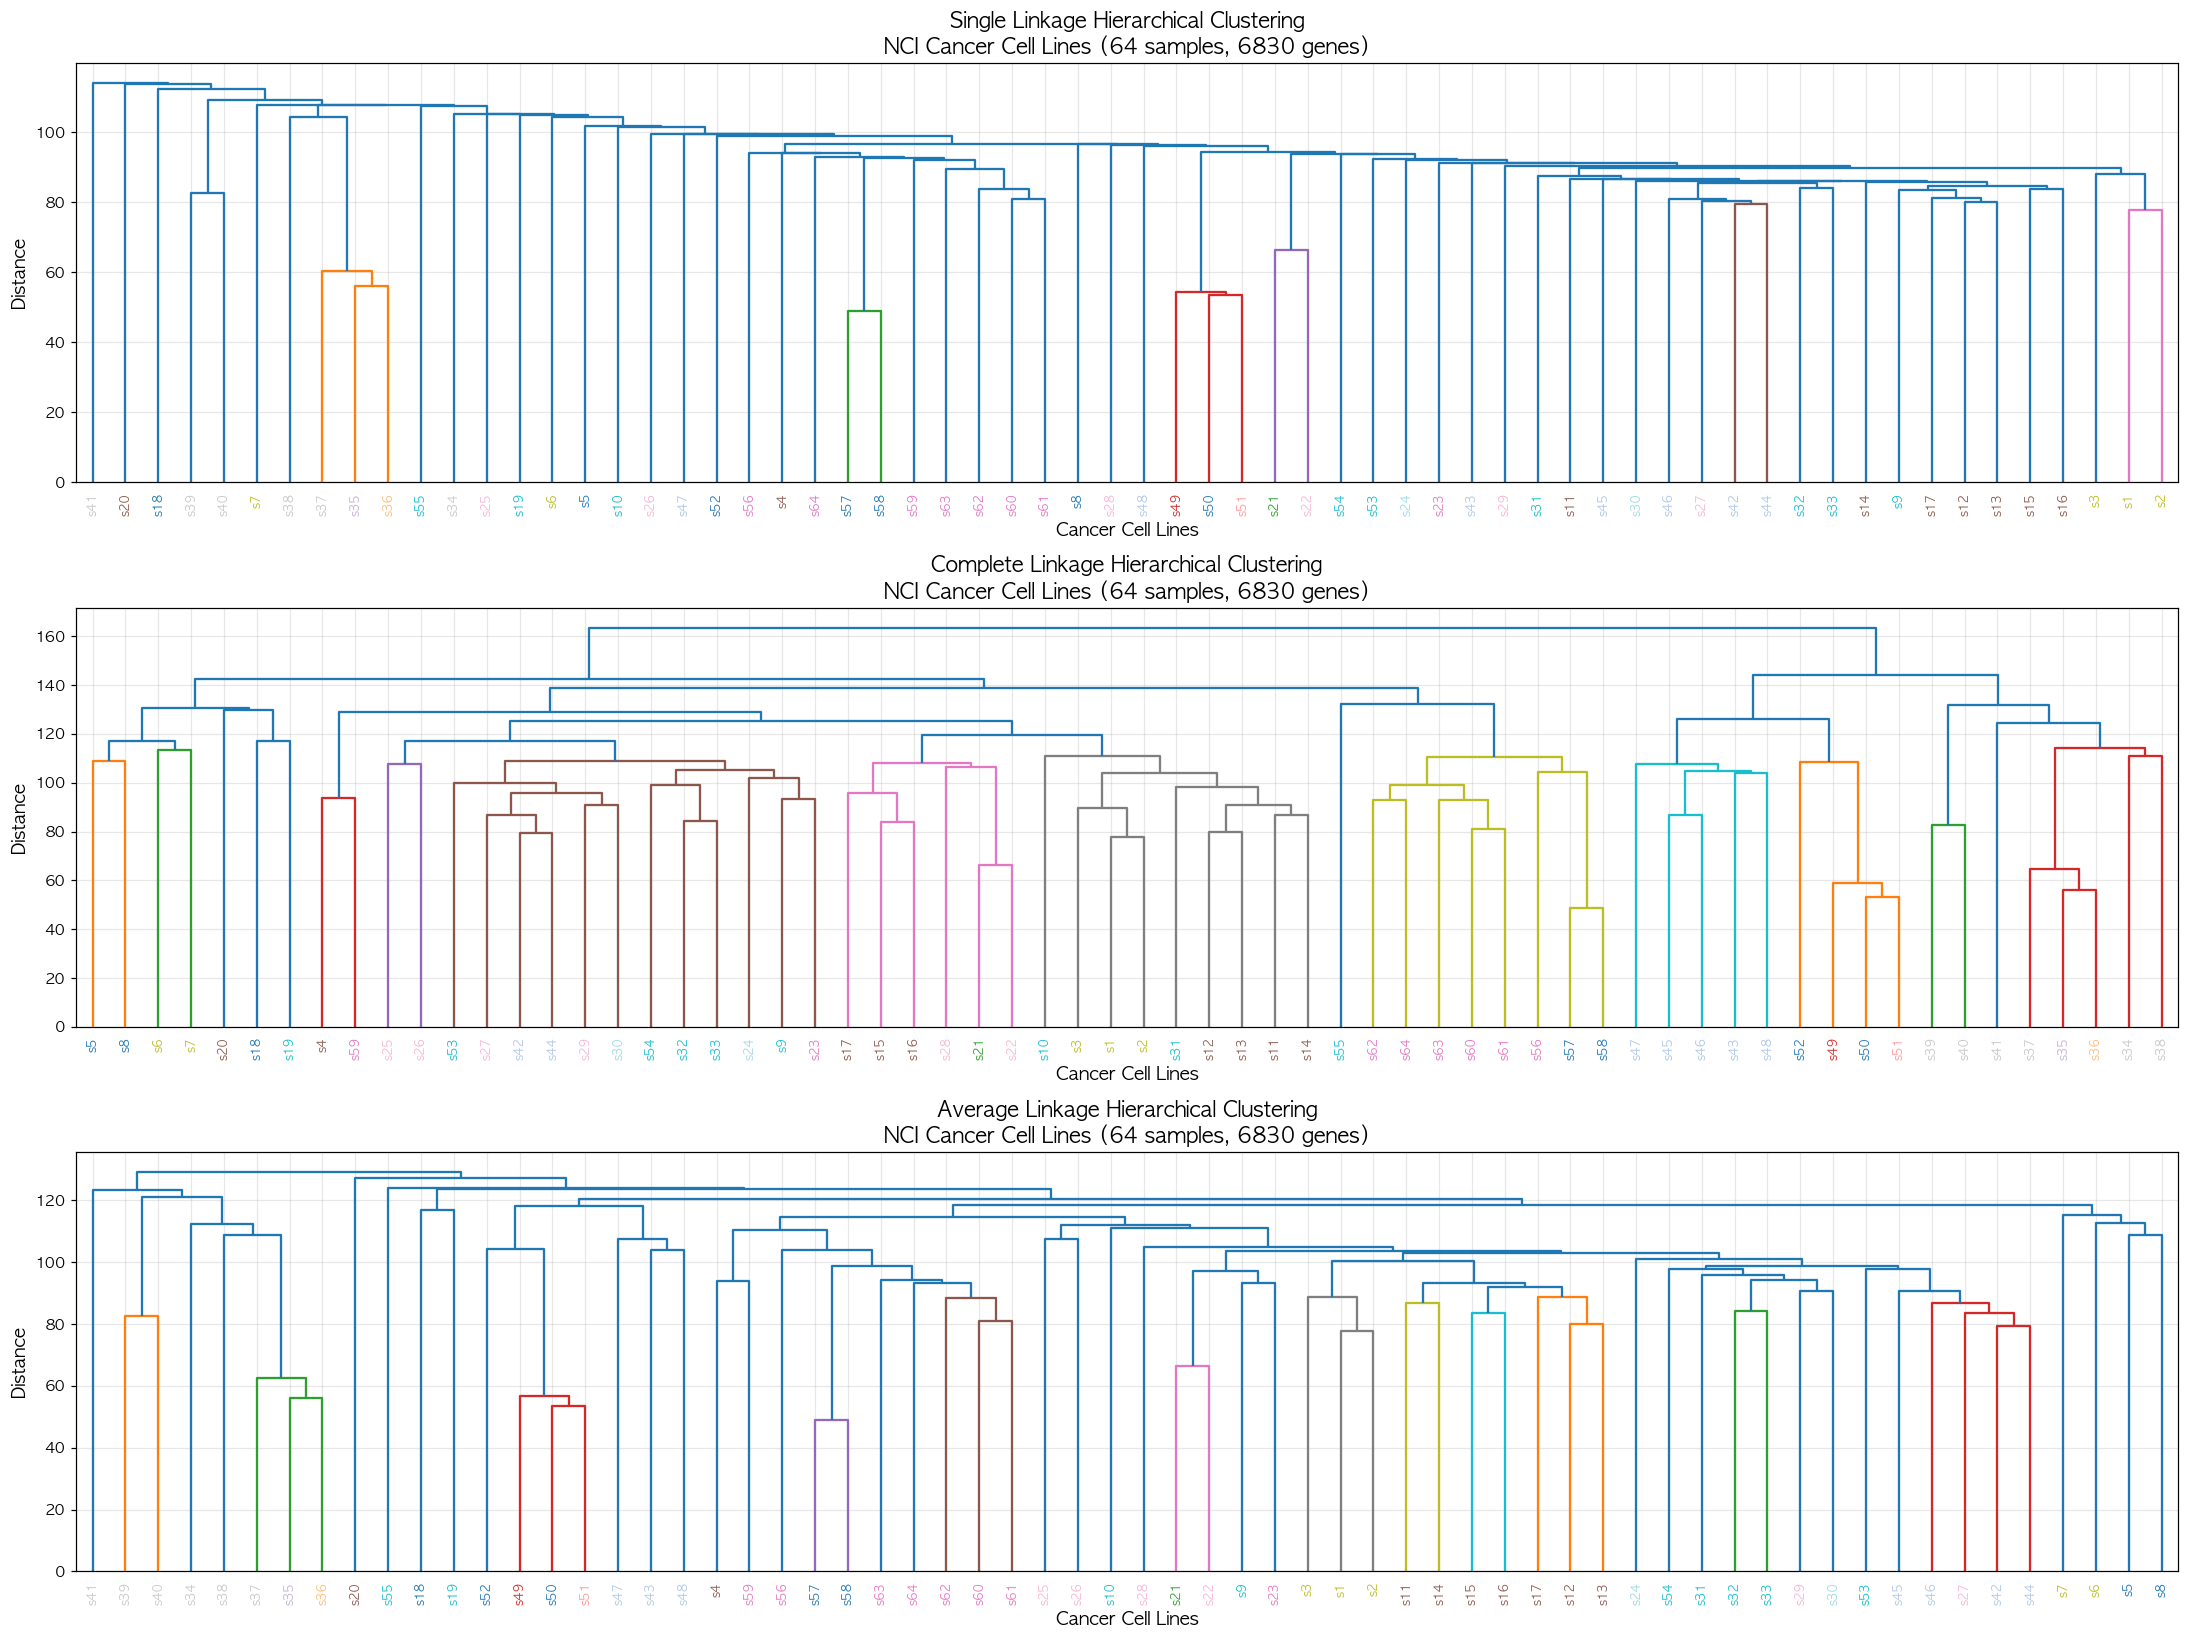

In [5]:
# Îç¥ÎìúÎ°úÍ∑∏Îû® ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

sample_names = nci_scaled.index.tolist()

for idx, method in enumerate(linkage_methods):
    ax = axes[idx]
    
    # Îç¥ÎìúÎ°úÍ∑∏Îû® ÏÉùÏÑ±
    dendro = dendrogram(
        linkage_results[method],
        labels=sample_names,
        ax=ax,
        leaf_rotation=90,
        leaf_font_size=8,
        color_threshold=0.7*max(linkage_results[method][:,2])  # ÏÉâÏÉÅ ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
    )
    
    ax.set_title(f'{method.capitalize()} Linkage Hierarchical Clustering\n'
                f'NCI Cancer Cell Lines (64 samples, 6830 genes)', 
                fontsize=14, fontweight='bold')
    ax.set_xlabel('Cancer Cell Lines', fontsize=12)
    ax.set_ylabel('Distance', fontsize=12)
    
    # xÏ∂ï ÎùºÎ≤® ÏÉâÏÉÅ ÏÑ§Ï†ï (Ïã§Ï†ú Ïïî ÌÉÄÏûÖÎ≥Ñ)
    xlbls = ax.get_xmajorticklabels()
    for lbl in xlbls:
        sample_name = lbl.get_text()
        sample_idx = sample_names.index(sample_name)
        cancer_type = nci_labels[sample_idx]
        lbl.set_color(real_cancer_type_colors[cancer_type])
    
    # Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()    


Íµ∞ÏßëÌôîÏùò Í≤∞Í≥ºÎ•º ÌèâÍ∞ÄÌïòÎäî ÏßÄÌëúÎ°ú **Ïã§Î£®Ïó£ ÏßÄÏàò**Í∞Ä ÏûàÏäµÎãàÎã§. Ïù¥Î•º ÌôúÏö©Ìï¥ÏÑú Îç¥ÎìúÎ°úÍ∑∏Îû®ÏùÑ Ïñ¥Îäê ÎÜíÏù¥ÏóêÏÑú ÏûòÎùº Íµ∞ÏßëÌôîÎ•º Ìï† Í≤ÉÏù∏ÏßÄÎ•º Í≤∞Ï†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.  

ÎààÏó¨Í≤®Î≥¥Ïã§ Î∂ÄÎ∂ÑÏùÄ  

    (1) Ïã§Î£®Ïó£ ÏßÄÏàòÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÏúÑÍ≥ÑÏ†Å Íµ∞ÏßëÏùò Î∂ÑÌï†ÏùÑ Í≤∞Ï†ïÌï† Ïàò ÏûàÎã§.  
    (2) Ïù¥ Í≤ΩÏö∞ Íµ∞Ïßë Î∂ÑÌï†Ïù¥ Ïù¥ÏÉÅÏ†ÅÏù¥ÏßÄ ÏïäÏùÑ Ïàò ÏûàÎã§.  

Îäî Ï†êÏûÖÎãàÎã§.

In [6]:
# ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ Î°úÎî©
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Í∞Å Ïó∞Í≤∞Î∞©Î≤ïÏóê ÎåÄÌï¥ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎ≥Ñ Ïã§Î£®Ïó£ Ï†êÏàò Í≥ÑÏÇ∞
silhouette_analysis = {}
optimal_clusters = {}

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Î≤îÏúÑ (2~15Í∞ú)
cluster_range = range(2, 16)

for method in linkage_methods:
    silhouette_scores = []
    cluster_nums = []
    
    for n_clusters in cluster_range:
        # Îç¥ÎìúÎ°úÍ∑∏Îû®ÏóêÏÑú n_clustersÍ∞úÎ°ú ÏûêÎ•¥Í∏∞
        clusters = fcluster(linkage_results[method], n_clusters, criterion='maxclust')
        
        actual_clusters = len(np.unique(clusters))
        
        if actual_clusters >= 2:  # Íµ∞ÏßëÏù¥ 1Í∞úÏùº ÎïåÏóêÎäî Î∂ÑÎ¶¨Í∞Ä ÎêòÏßÄ ÏïäÏùÄ Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïã§Î£®Ïó£ Ï†êÏàòÍ∞Ä ÎÇòÏò§ÏßÄ ÏïäÏäµÎãàÎã§.
            sil_score = silhouette_score(nci_scaled, clusters)
            silhouette_scores.append(sil_score)
            cluster_nums.append(n_clusters)
            
            print(f"  {n_clusters}Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = {sil_score:.4f}")
    
    # Í≤∞Í≥º Ï†ÄÏû•
    silhouette_analysis[method] = {
        'cluster_nums': cluster_nums,
        'silhouette_scores': silhouette_scores
    }
    
    # ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Ï∞æÍ∏∞
    if silhouette_scores:
        best_idx = np.argmax(silhouette_scores)
        optimal_k = cluster_nums[best_idx]
        best_score = silhouette_scores[best_idx]
        optimal_clusters[method] = {
            'k': optimal_k,
            'score': best_score
        }
        print(f"ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {optimal_k}Í∞ú (Ïã§Î£®Ïó£ Ï†êÏàò: {best_score:.4f})\n")

print(f"\n" + "=" * 70)
print("Ïã§Î£®Ïó£ ÏßÄÏàò Í∏∞Ï§Ä ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò ÏöîÏïΩ")
print("=" * 70)

for method, result in optimal_clusters.items():
    print(f"{method.capitalize():>12} linkage: {result['k']:2d}Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞ (Ï†êÏàò: {result['score']:.4f})")

# Ï†ÑÏ≤¥ ÏµúÍ≥† ÏÑ±Îä• Î∞©Î≤ï ÏãùÎ≥Ñ
# if optimal_clusters:
#     best_overall_method = max(optimal_clusters.keys(), 
#                              key=lambda x: optimal_clusters[x]['score'])
#     best_overall = optimal_clusters[best_overall_method]

  2Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0827
  3Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0658
  4Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0598
  5Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0741
  6Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0624
  7Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0790
  8Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0744
  9Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0613
  10Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0528
  11Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0468
  12Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0502
  13Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0497
  14Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0481
  15Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0432
ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 2Í∞ú (Ïã§Î£®Ïó£ Ï†êÏàò: 0.0827)

  2Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0924
  3Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0813
  4Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0702
  5Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0754
  6Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0785
  7Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞: Ïã§Î£®Ïó£ Ï†êÏàò = 0.0

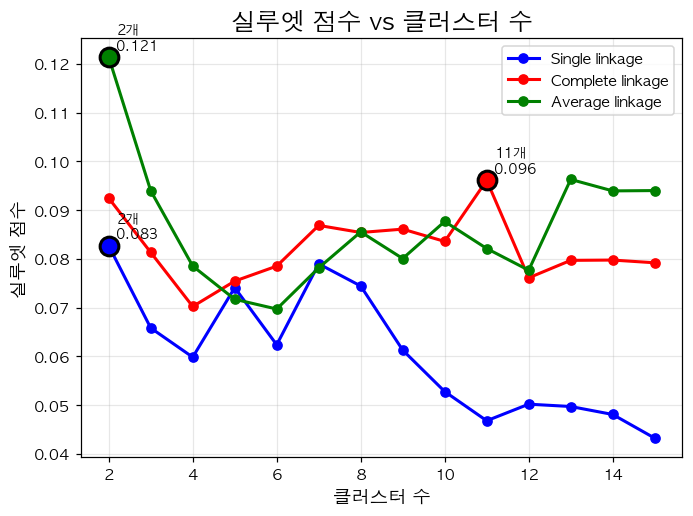

In [7]:
## Ïã§Î£®Ïó£ ÏßÄÏàòÎ•º Ïù¥Ïö©Ìïú Îç¥ÎìúÎ°úÍ∑∏Îû® Î∂ÑÌï† Í≤∞Í≥º ÏãúÍ∞ÅÌôî

colors = ['blue', 'red', 'green']

for i, method in enumerate(linkage_methods):
    if method in silhouette_analysis:
        data = silhouette_analysis[method]
        plt.plot(data['cluster_nums'], data['silhouette_scores'], 
                'o-', color=colors[i], linewidth=2, markersize=6,
                label=f'{method.capitalize()} linkage')
        
        # ÏµúÏ†ÅÏ†ê Í∞ïÏ°∞
        if method in optimal_clusters:
            opt_k = optimal_clusters[method]['k']
            opt_score = optimal_clusters[method]['score']
            plt.scatter([opt_k], [opt_score], color=colors[i], 
                       s=150, edgecolor='black', linewidth=2, zorder=5)
            plt.annotate(f'{opt_k}Í∞ú\n{opt_score:.3f}', 
                        (opt_k, opt_score), 
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=9, fontweight='bold')

plt.xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò', fontsize=12)
plt.ylabel('Ïã§Î£®Ïó£ Ï†êÏàò', fontsize=12)
plt.title('Ïã§Î£®Ïó£ Ï†êÏàò vs ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò', fontweight='bold', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
## Ïã§Î£®Ïó£ Ï†êÏàò Í∏∞Ï§Ä ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóêÏÑú Ïã§Ï†ú Ïïî ÎùºÎ≤® Î∂ÑÌè¨ Î∂ÑÏÑù

print("Ïã§Î£®Ïó£ Ï†êÏàò Í∏∞Ï§Ä ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóêÏÑú Ïã§Ï†ú Ïïî ÎùºÎ≤® Î∂ÑÌè¨ Î∂ÑÏÑù")
print("="*70)

cluster_cancer_distribution = {}

for method in linkage_methods:
    if method in optimal_clusters:
        opt_k = optimal_clusters[method]['k']
        opt_score = optimal_clusters[method]['score']
        
        # fclusterÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎ°ú Íµ∞Ïßë ÎÇòÎàÑÍ∏∞
        from scipy.cluster.hierarchy import fcluster
        cluster_labels = fcluster(linkage_results[method], opt_k, criterion='maxclust')
        
        print(f"\n{method.upper()} LINKAGE (ÏµúÏ†Å {opt_k}Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞, Ïã§Î£®Ïó£ Ï†êÏàò: {opt_score:.4f})")
        print("-" * 60)
        
        # ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïïî ÌÉÄÏûÖ Î∂ÑÌè¨ Î∂ÑÏÑù
        cluster_distribution = {}
        for cluster_id in range(1, opt_k + 1):
            cluster_mask = cluster_labels == cluster_id
            cluster_samples = np.array(nci_labels)[cluster_mask]
            
            # ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎÇ¥ Ïïî ÌÉÄÏûÖ Î∂ÑÌè¨ Í≥ÑÏÇ∞
            cancer_counts = pd.Series(cluster_samples).value_counts()
            cluster_size = len(cluster_samples)
            
            cluster_distribution[cluster_id] = {
                'size': cluster_size,
                'cancer_counts': cancer_counts,
                'cancer_percentages': (cancer_counts / cluster_size * 100).round(1)
            }
            
            print(f"  ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id} ({cluster_size}Í∞ú ÏÉòÌîå):")
            for cancer_type, count in cancer_counts.head(3).items():  # Í∞Å Íµ∞ÏßëÎ≥ÑÎ°ú Íµ¨ÏÑ±ÎπÑÏú®Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ ÌÉÄÏûÖ 3Í∞ú ÌëúÏãú
                percentage = count / cluster_size * 100
                print(f"    ‚Ä¢ {cancer_type:<15}: {count:2d}Í∞ú")
            
            if len(cancer_counts) > 3:
                others = cluster_size - cancer_counts.head(3).sum()
                print(f"    ‚Ä¢ Í∏∞ÌÉÄ {len(cancer_counts)-3}Í∞ú ÌÉÄÏûÖ    : {others:2d}Í∞ú")
        
        cluster_cancer_distribution[method] = cluster_distribution

Ïã§Î£®Ïó£ Ï†êÏàò Í∏∞Ï§Ä ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóêÏÑú Ïã§Ï†ú Ïïî ÎùºÎ≤® Î∂ÑÌè¨ Î∂ÑÏÑù

SINGLE LINKAGE (ÏµúÏ†Å 2Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞, Ïã§Î£®Ïó£ Ï†êÏàò: 0.0827)
------------------------------------------------------------
  ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 (63Í∞ú ÏÉòÌîå):
    ‚Ä¢ RENAL          :  9Í∞ú
    ‚Ä¢ NSCLC          :  9Í∞ú
    ‚Ä¢ MELANOMA       :  8Í∞ú
    ‚Ä¢ Í∏∞ÌÉÄ 11Í∞ú ÌÉÄÏûÖ    : 37Í∞ú
  ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 (1Í∞ú ÏÉòÌîå):
    ‚Ä¢ LEUKEMIA       :  1Í∞ú

COMPLETE LINKAGE (ÏµúÏ†Å 11Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞, Ïã§Î£®Ïó£ Ï†êÏàò: 0.0961)
------------------------------------------------------------
  ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 (4Í∞ú ÏÉòÌîå):
    ‚Ä¢ BREAST         :  2Í∞ú
    ‚Ä¢ CNS            :  2Í∞ú
  ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 (2Í∞ú ÏÉòÌîå):
    ‚Ä¢ BREAST         :  1Í∞ú
    ‚Ä¢ NSCLC          :  1Í∞ú
  ÌÅ¥Îü¨Ïä§ÌÑ∞ 3 (1Í∞ú ÏÉòÌîå):
    ‚Ä¢ RENAL          :  1Í∞ú
  ÌÅ¥Îü¨Ïä§ÌÑ∞ 4 (2Í∞ú ÏÉòÌîå):
    ‚Ä¢ RENAL          :  1Í∞ú
    ‚Ä¢ MELANOMA       :  1Í∞ú
  ÌÅ¥Îü¨Ïä§ÌÑ∞ 5 (29Í∞ú ÏÉòÌîå):
    ‚Ä¢ NSCLC          :  7Í∞ú
    ‚Ä¢ RENAL  

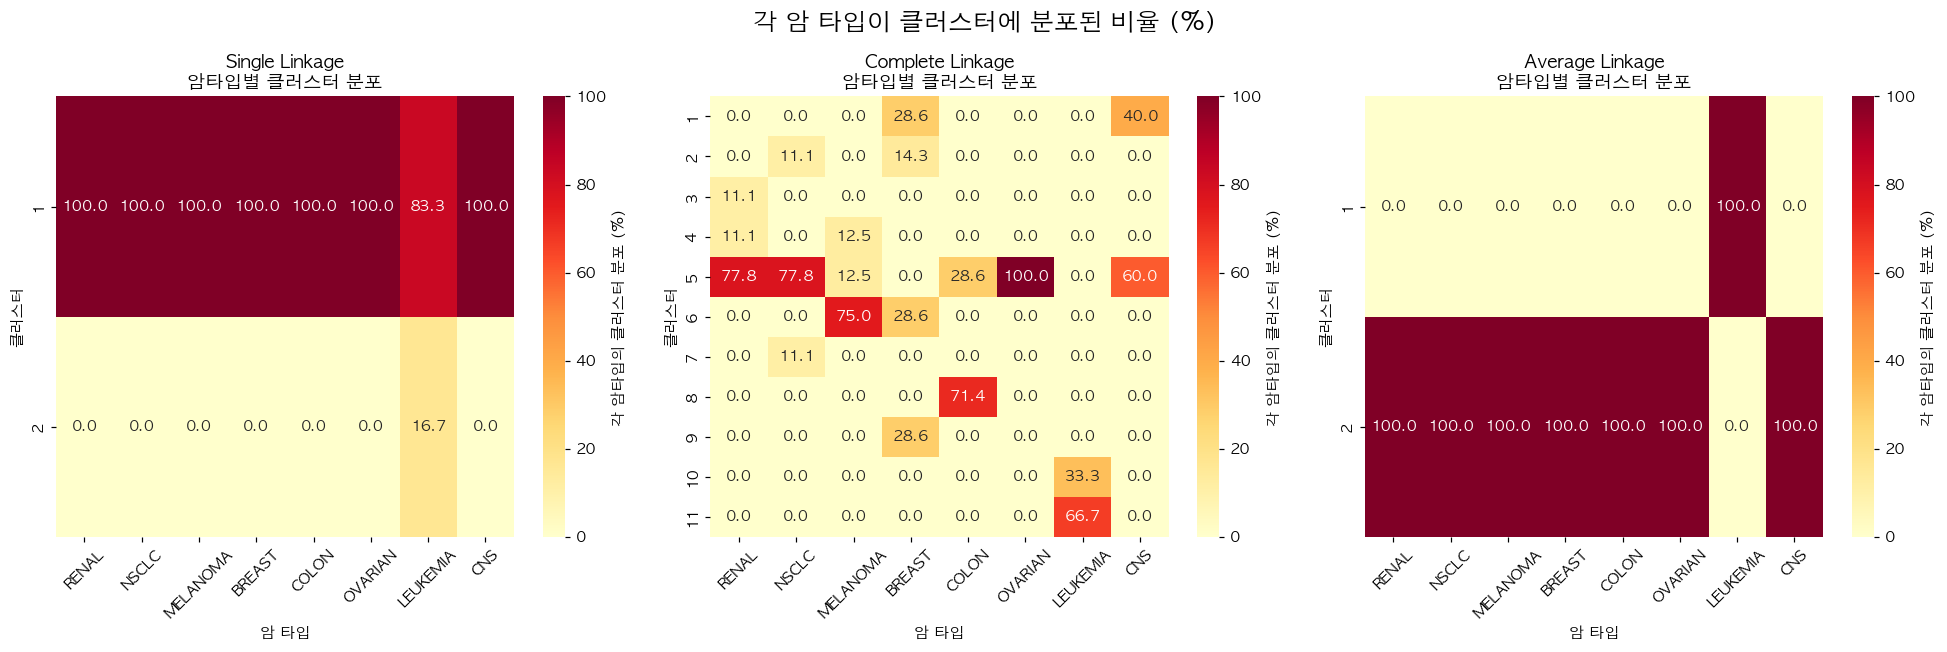

In [9]:
## Í∞Å Ïó∞Í≤∞Î∞©Î≤ïÎ≥Ñ ÏµúÏ†Å Íµ∞ÏßëÍ≥º ÏïîÌÉÄÏûÖ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî (ÏïîÌÉÄÏûÖÎ≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨)

import seaborn as sns

# Í∞Å Ïó∞Í≤∞Î∞©Î≤ïÎ≥ÑÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞-ÏïîÌÉÄÏûÖ Î∂ÑÌè¨ ÌûàÌä∏Îßµ ÏÉùÏÑ±
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, method in enumerate(linkage_methods):
    if method in optimal_clusters and method in cluster_cancer_distribution:
        opt_k = optimal_clusters[method]['k']
        distribution = cluster_cancer_distribution[method]
        
        cluster_labels = fcluster(linkage_results[method], opt_k, criterion='maxclust')
        
        df_temp = pd.DataFrame({
            'cluster': cluster_labels,
            'cancer_type': nci_labels
        })
        
        # ÏïîÌÉÄÏûÖÎ≥ÑÎ°ú Ï†ïÍ∑úÌôî: Í∞Å ÏïîÌÉÄÏûÖÏù¥ Ïñ¥Îñ§ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏñºÎßàÎÇò Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÎäîÏßÄ
        crosstab = pd.crosstab(df_temp['cluster'], df_temp['cancer_type'], normalize='columns') * 100
        
        # Ï£ºÏöî ÏïîÌÉÄÏûÖÎßå ÏÑ†ÌÉù (Ï†ÑÏ≤¥ ÏÉòÌîå ÏàòÍ∞Ä 3Í∞ú Ïù¥ÏÉÅÏù∏ Í≤ÉÎì§)
        cancer_counts_total = pd.Series(nci_labels).value_counts()
        major_cancers = cancer_counts_total[cancer_counts_total >= 3].index[:10]  # ÏÉÅÏúÑ 10Í∞úÎßå
        
        crosstab_filtered = crosstab[major_cancers]
        
        # ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
        ax = axes[idx]
        sns.heatmap(crosstab_filtered, annot=True, fmt='.1f', cmap='YlOrRd', 
                   ax=ax, cbar_kws={'label': 'Í∞Å ÏïîÌÉÄÏûÖÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨ (%)'})
        
        ax.set_title(f'{method.capitalize()} Linkage\nÏïîÌÉÄÏûÖÎ≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨', 
                    fontweight='bold', fontsize=12)
        ax.set_xlabel('Ïïî ÌÉÄÏûÖ', fontsize=10)
        ax.set_ylabel('ÌÅ¥Îü¨Ïä§ÌÑ∞', fontsize=10)
        ax.tick_params(axis='x', rotation=45)

plt.suptitle('Í∞Å Ïïî ÌÉÄÏûÖÏù¥ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê Î∂ÑÌè¨Îêú ÎπÑÏú® (%)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [10]:
## Í∞Å Ïó∞Í≤∞Î∞©Î≤ïÏùò ÌäπÏÑ± ÌôïÏù∏
def analyze_linkage_characteristics(linkage_results):
    """
    Í∞Å Ïó∞Í≤∞Î∞©Î≤ïÎ≥ÑÎ°ú Íµ∞Ïßë Í∞ÑÏùò Í±∞Î¶¨Í∞Ä Ïñ¥ÎñªÍ≤å Î∂ÑÌè¨ÌïòÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.
    """
    analysis = {}
    
    for method, Z in linkage_results.items():
        merge_distances = Z[:, 2]
        
        analysis[method] = {
            'ÏµúÏÜå_Í±∞Î¶¨': merge_distances.min(),
            'ÌèâÍ∑†_Í±∞Î¶¨': merge_distances.mean(),
            'ÌëúÏ§ÄÌé∏Ï∞®': merge_distances.std(),
            'ÏµúÏ¢Ö_Î≥ëÌï©_Í±∞Î¶¨': merge_distances[-1]  # Íµ∞ÏßëÏù¥ 2Í∞úÏóêÏÑú 1Í∞úÎ°ú Ï§ÑÏñ¥ÎìúÎäî Îã®Í≥ÑÏóêÏÑú Íµ∞Ïßë ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨
        }
    
    return analysis

linkage_analysis = analyze_linkage_characteristics(linkage_results)

# Í≤∞Í≥º Ï∂úÎ†•
print("=" * 80)
print("NCI Îç∞Ïù¥ÌÑ∞ ÏúÑÍ≥ÑÏ†Å Íµ∞ÏßëÎ∂ÑÏÑù: Ïó∞Í≤∞Î∞©Î≤ïÎ≥Ñ ÌäπÏÑ± ÎπÑÍµê")
print("=" * 80)

comparison_df = pd.DataFrame(linkage_analysis).T
print(comparison_df.round(3))

NCI Îç∞Ïù¥ÌÑ∞ ÏúÑÍ≥ÑÏ†Å Íµ∞ÏßëÎ∂ÑÏÑù: Ïó∞Í≤∞Î∞©Î≤ïÎ≥Ñ ÌäπÏÑ± ÎπÑÍµê
           ÏµúÏÜå_Í±∞Î¶¨    ÌèâÍ∑†_Í±∞Î¶¨    ÌëúÏ§ÄÌé∏Ï∞®  ÏµúÏ¢Ö_Î≥ëÌï©_Í±∞Î¶¨
single    48.827   89.848  14.222   113.933
complete  48.827  102.232  22.708   163.490
average   48.827   97.274  18.382   129.117


### 7.2. K-ÌèâÍ∑† Íµ∞ÏßëÎ∂ÑÏÑù

Í∑∏Î¶¨Îìú ÏÑúÏπò Î∞©ÏãùÏúºÎ°ú ÏµúÏ†ÅÏùò KÍ∞íÏùÑ Ï∞æÏùÄ ÌõÑ Íµ∞ÏßëÌôîÎ•º ÌïòÏó¨ ÏúÑÍ≥ÑÏ†Å Íµ∞ÏßëÍ≥º ÎπÑÍµêÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§.  
  
ÏµúÏ†ÅÏùò KÍ∞íÏùÑ Ï∞æÍ∏∞ ÏúÑÌï¥ Í∞≠ ÌÜµÍ≥ÑÎüâÍ≥º Ïã§Î£®Ïó£ ÏßÄÏàò Îëê Í∞ÄÏßÄÎ•º Î™®Îëê Ïù¥Ïö©Ìïú ÌõÑ Í≤∞Í≥ºÎ•º ÎπÑÍµêÌï©ÎãàÎã§.  

In [17]:
# Í∞≠ ÌÜµÍ≥ÑÎüâÏùÄ ÏãúÎÆ¨Î†àÏù¥ÏÖòÏùÑ ÌÜµÌï¥ Í∞íÏùÑ Í≥ÑÏÇ∞Ìï¥ÏïºÌï©ÎãàÎã§. 
# Î™á Í∞úÏùò Ìå®ÌÇ§ÏßÄÍ∞Ä ÏûàÎäîÎç∞ Í∞ÄÏû• ÏµúÍ∑ºÏóê ÏóÖÎç∞Ïù¥Ìä∏Îêú gapstatistics Ìå®ÌÇ§ÏßÄÎ•º ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
from gapstatistics.gapstatistics import GapStatistics

# K Í∞í Î≤îÏúÑ ÏÑ§Ï†ï (1Î∂ÄÌÑ∞ 20ÍπåÏßÄ)
k_range = range(1, 21)
sse_values = [] # SSE
silhouette_scores = [] # Ïã§Î£®Ïó£ ÏßÄÏàò

# Í∞Å K Í∞íÏóê ÎåÄÌï¥ K-means ÏàòÌñâ Î∞è SSE Í≥ÑÏÇ∞
for k in k_range:
    if k == 1:
        # K=1Ïùº ÎïåÎäî SSEÎßå Í≥ÑÏÇ∞
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(nci_scaled)
        sse_values.append(kmeans.inertia_)
    else:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(nci_scaled)
        sil_score = silhouette_score(nci_scaled, cluster_labels)
        
        # SSEÏôÄ Ïã§Î£®Ïó£ ÏßÄÏàò Ï†ÄÏû•
        sse_values.append(kmeans.inertia_)
        silhouette_scores.append(sil_score)


# ÏµúÍ≥† Ïã§Î£®Ïó£ Ï†êÏàò Ï∞æÍ∏∞
best_sil_idx = np.argmax(silhouette_scores)
best_k_sil = k_range_sil[best_sil_idx]
best_sil_score = silhouette_scores[best_sil_idx]


# Í∞≠ ÌÜµÍ≥ÑÎüâÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÏµúÏ†Å K ÌÉêÏÉâ

# GapStatistics Í∞ùÏ≤¥ ÏÉùÏÑ±
gap_stat = GapStatistics(
    algorithm=KMeans,
    distance_metric='euclidean',
    return_params=True
    )

max_k = 20 # k Í∞íÏùò Î≤îÏúÑÎäî 20ÍπåÏßÄ

result = gap_stat.fit_predict(K=max_k, X=nci_scaled.values, n_iterations=20)
optimal_k_gap, gap_details = result

print(f"   ÏµúÏ†Å K: {optimal_k_gap}")


# Í≤∞Í≥º Ï∂úÎ†•
results_df = pd.DataFrame({
    'K': list(k_range),
    'SSE': sse_values,
    'Silhouette_Score': [0.0] + silhouette_scores if len(silhouette_scores) == len(k_range)-1 else [0.0] * len(k_range)
})

print(results_df)

   ÏµúÏ†Å K: 7
   Í∞≠ ÌÜµÍ≥ÑÎüâ Î∞∞Ïó¥ Í∏∏Ïù¥: 20
   Wks Î∞∞Ïó¥ Í∏∏Ïù¥: 20
     K            SSE  Silhouette_Score
0    1  437120.000000          0.000000
1    2  398638.638939          0.086136
2    3  373003.200551          0.075620
3    4  350737.487472          0.085167
4    5  336620.615731          0.081064
5    6  324517.481867          0.081959
6    7  318839.574486          0.073226
7    8  299919.208469          0.085268
8    9  290860.533622          0.077654
9   10  283742.866985          0.073724
10  11  273119.148969          0.088017
11  12  267650.267104          0.074663
12  13  260268.597169          0.075758
13  14  249855.976150          0.079217
14  15  244364.604383          0.081062
15  16  235697.907226          0.067405
16  17  229441.341130          0.078216
17  18  220821.943626          0.062411
18  19  211872.175463          0.087538
19  20  205537.535315          0.081862


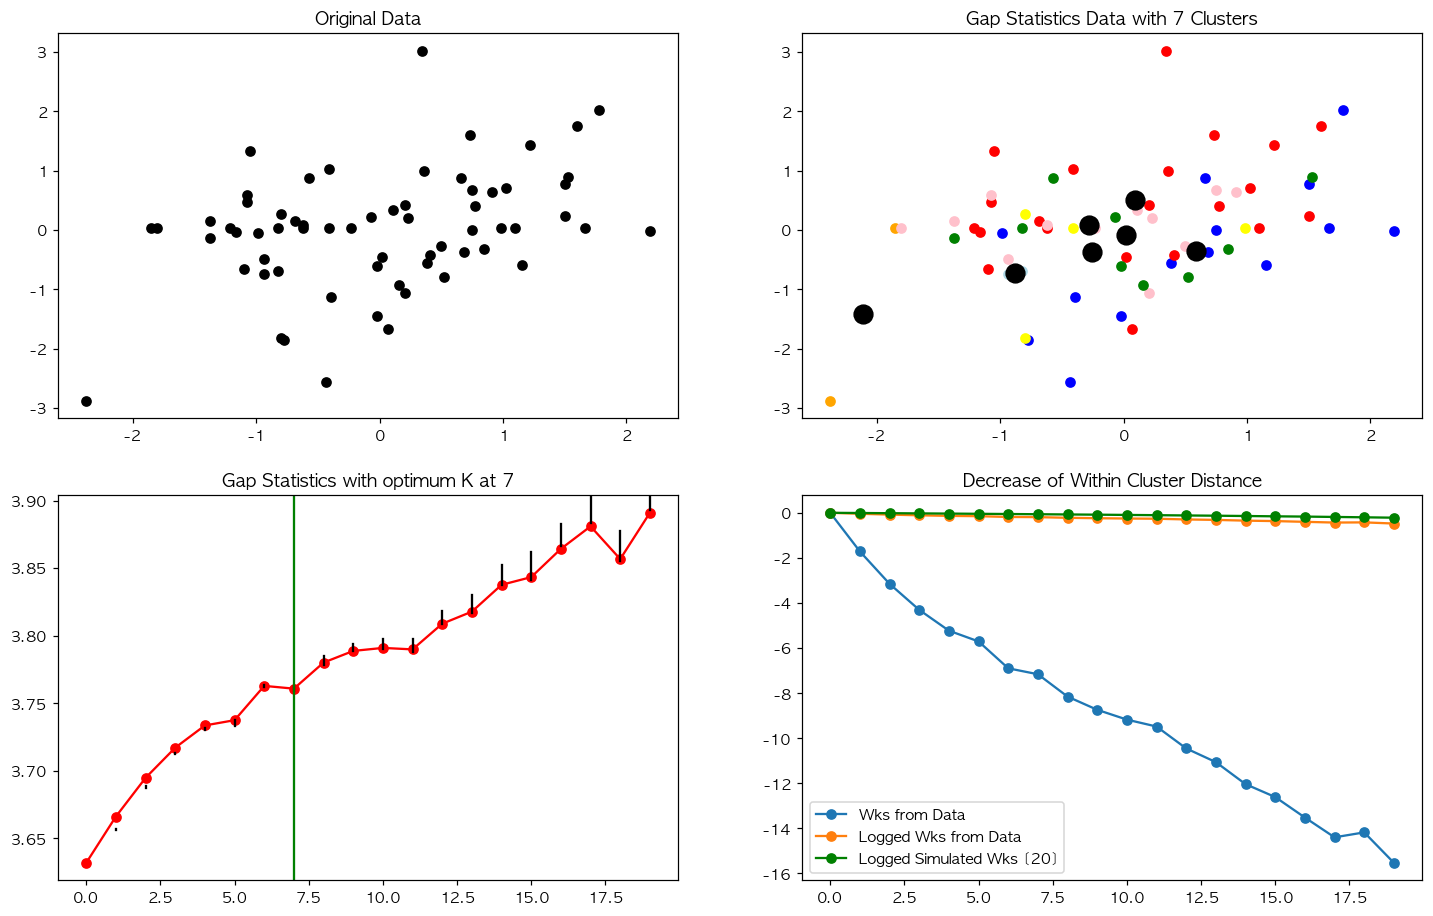

<Figure size 704x528 with 0 Axes>

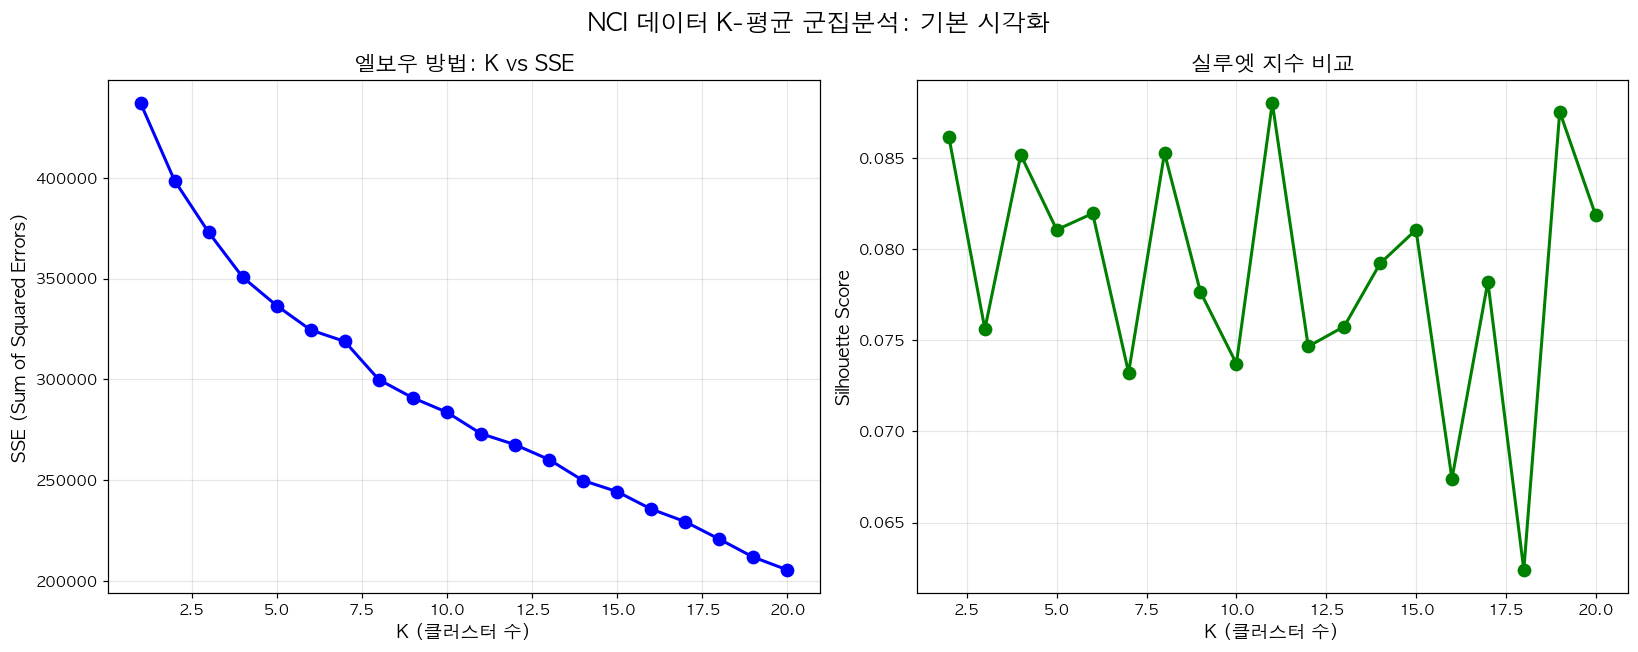

In [18]:
# Î∂ÑÏÑù Í≤∞Í≥º ÏãúÍ∞ÅÌôî
## gapstatistics Ìå®ÌÇ§ÏßÄÏóê ÎÇ¥Ïû•Îêú Î©îÏÑúÎìú ÏÇ¨Ïö©
gap_stat.plot()
plt.tight_layout()
plt.show()
    
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# SSE vs K Í∑∏ÎûòÌîÑ
ax1 = axes[0]
ax1.plot(k_range, sse_values, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('K (ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò)', fontsize=12)
ax1.set_ylabel('SSE (Sum of Squared Errors)', fontsize=12)
ax1.set_title('ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï: K vs SSE', fontweight='bold', fontsize=14)
ax1.grid(True, alpha=0.3)

## Ïã§Î£®Ïó£ ÏßÄÏàò Í∑∏ÎûòÌîÑ
ax2 = axes[1]
if silhouette_scores:
    ax2.plot(k_range_sil, silhouette_scores, 'go-', linewidth=2, markersize=8)
    ax2.set_xlabel('K (ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò)', fontsize=12)
    ax2.set_ylabel('Silhouette Score', fontsize=12)  
    ax2.set_title('Ïã§Î£®Ïó£ ÏßÄÏàò ÎπÑÍµê', fontweight='bold', fontsize=14)
    ax2.grid(True, alpha=0.3)

plt.suptitle('NCI Îç∞Ïù¥ÌÑ∞ K-ÌèâÍ∑† Íµ∞ÏßëÎ∂ÑÏÑù: Í∏∞Î≥∏ ÏãúÍ∞ÅÌôî', 
                fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [21]:
# Í∞≠ ÌÜµÍ≥ÑÎüâ Í∏∞Î∞ò K-ÌèâÍ∑† (6Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)
gap_k = optimal_k_gap
kmeans_gap = KMeans(n_clusters=gap_k, random_state=42, n_init=10)
labels_gap = kmeans_gap.fit_predict(nci_scaled)

# Ïã§Î£®Ïó£ ÏßÄÏàò Í∏∞Î∞ò K-ÌèâÍ∑† (11Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)
sil_k = best_k_sil
kmeans_sil = KMeans(n_clusters=sil_k, random_state=42, n_init=10)
labels_sil = kmeans_sil.fit_predict(nci_scaled)

# ÏúÑÍ≥ÑÏ†Å Íµ∞Ïßë : Single Linkage (2Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)
single_k = optimal_clusters['single']['k']
labels_single = fcluster(linkage_results['single'], single_k, criterion='maxclust')

# ÏúÑÍ≥ÑÏ†Å Íµ∞Ïßë : Complete Linkage (11Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)
complete_k = optimal_clusters['complete']['k']
labels_complete = fcluster(linkage_results['complete'], complete_k, criterion='maxclust')

# ÏúÑÍ≥ÑÏ†Å Íµ∞Ïßë : Average Linkage (2Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)
average_k = optimal_clusters['average']['k']
labels_average = fcluster(linkage_results['average'], average_k, criterion='maxclust')

# Îã§ÏÑØ Í∞ÄÏßÄ Î∞©Î≤ïÏùò Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Íµ¨ÏÑ±
clustering_comparison_df = pd.DataFrame({
    'Sample_ID': nci_scaled.index,
    'True_Cancer_Type': nci_labels,
    'Gap_KMeans': labels_gap,
    'Silhouette_KMeans': labels_sil,
    'Hierarchical_Single': labels_single,
    'Hierarchical_Complete': labels_complete,
    'Hierarchical_Average': labels_average
})

In [31]:
# ÍµêÏ∞®Ìëú ÏÉùÏÑ± Ìï®Ïàò
def create_crosstab_analysis(true_labels, predicted_labels):
    """
    ÍµêÏ∞®ÌëúÎ•º ÏÉùÏÑ±ÌïòÍ≥† Î∂ÑÏÑùÌïòÎäî Ìï®Ïàò
    """
   
    # ÍµêÏ∞®Ìëú ÏÉùÏÑ± (Ìñâ: Ïã§Ï†ú Ïïî ÌÉÄÏûÖ, Ïó¥: ÏòàÏ∏° ÌÅ¥Îü¨Ïä§ÌÑ∞)
    crosstab = pd.crosstab(
        pd.Series(true_labels, name='Ïã§Ï†ú_ÏïîÌÉÄÏûÖ'), 
        pd.Series(predicted_labels, name='ÏòàÏ∏°_ÌÅ¥Îü¨Ïä§ÌÑ∞'),
        margins=True
    )
    
    print("ÍµêÏ∞®Ìëú (Ìñâ: Ïã§Ï†ú Ïïî ÌÉÄÏûÖ, Ïó¥: ÏòàÏ∏° ÌÅ¥Îü¨Ïä§ÌÑ∞):")
    print(crosstab)
    print("\n\n")

# Í∞Å Î∞©Î≤ïÎ≥Ñ ÍµêÏ∞®Ìëú Î∂ÑÏÑù
print("Í∞≠ ÌÜµÍ≥ÑÎüâ Í∏∞Î∞ò K-ÌèâÍ∑† (6Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)")
crosstab_gap = create_crosstab_analysis(
    nci_labels, labels_gap
)

print("Ïã§Î£®Ïó£ ÏßÄÏàò Í∏∞Î∞ò K-ÌèâÍ∑† (11Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)")
crosstab_sil = create_crosstab_analysis(
    nci_labels, labels_sil
)

print("ÏúÑÍ≥ÑÏ†Å Íµ∞Ïßë: Single Linkage (2Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)")
crosstab_single = create_crosstab_analysis(
    nci_labels, labels_single
)

print("ÏúÑÍ≥ÑÏ†Å Íµ∞Ïßë: Complete Linkage (11Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)")
crosstab_complete = create_crosstab_analysis(
    nci_labels, labels_complete
)

print("ÏúÑÍ≥ÑÏ†Å Íµ∞Ïßë: Average Linkage (2Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)")
crosstab_average = create_crosstab_analysis(
    nci_labels, labels_average
)

Í∞≠ ÌÜµÍ≥ÑÎüâ Í∏∞Î∞ò K-ÌèâÍ∑† (6Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)
ÍµêÏ∞®Ìëú (Ìñâ: Ïã§Ï†ú Ïïî ÌÉÄÏûÖ, Ïó¥: ÏòàÏ∏° ÌÅ¥Îü¨Ïä§ÌÑ∞):
ÏòàÏ∏°_ÌÅ¥Îü¨Ïä§ÌÑ∞      0   1   2  3  4  5  6  All
Ïã§Ï†ú_ÏïîÌÉÄÏûÖ                                 
BREAST       2   2   0  1  2  0  0    7
CNS          0   1   1  3  0  0  0    5
COLON        0   0   1  0  0  6  0    7
K562A-repro  0   0   0  0  0  0  1    1
K562B-repro  0   0   0  0  0  0  1    1
LEUKEMIA     0   0   1  0  0  3  2    6
MCF7A-repro  1   0   0  0  0  0  0    1
MCF7D-repro  1   0   0  0  0  0  0    1
MELANOMA     0   0   1  0  7  0  0    8
NSCLC        0   1   7  1  0  0  0    9
OVARIAN      0   3   3  0  0  0  0    6
PROSTATE     0   1   1  0  0  0  0    2
RENAL        0   2   6  1  0  0  0    9
UNKNOWN      0   1   0  0  0  0  0    1
All          4  11  21  6  9  9  4   64



Ïã§Î£®Ïó£ ÏßÄÏàò Í∏∞Î∞ò K-ÌèâÍ∑† (11Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)
ÍµêÏ∞®Ìëú (Ìñâ: Ïã§Ï†ú Ïïî ÌÉÄÏûÖ, Ïó¥: ÏòàÏ∏° ÌÅ¥Îü¨Ïä§ÌÑ∞):
ÏòàÏ∏°_ÌÅ¥Îü¨Ïä§ÌÑ∞      0  1   2  3  4  5  6  7   8  9  10  All
Ïã

## 7.3. DBSCAN

ÎèôÏùºÌïú ÏïîÏÑ∏Ìè¨ Ïú†Ï†ÑÏûê Îç∞Ïù¥ÌÑ∞Î°ú DBSCANÏùÑ ÏàòÌñâÌïòÎäî ÏòàÏ†ú ÏΩîÎìúÏûÖÎãàÎã§.  

ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ïóê Ìï¥ÎãπÌïòÎäî epsÏôÄ min_samples_rangeÏùò Î≥ÄÌôîÏóê Îî∞Îùº ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÉùÏÑ±ÌïòÎäî Íµ∞ÏßëÏù¥ Ïñ¥ÎñªÍ≤å Îã¨ÎùºÏßÄÎäîÏßÄÎ•º ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
# DBSCANÏùò epsÍ∞í ÏÑ§Ï†ï
## epsÍ∞íÏùÑ ÏÑ§Ï†ïÌïòÎäî Î∞©Î≤ïÏùÄ KNNÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÏóòÎ≥¥Ïö∞ Ìè¨Ïù∏Ìä∏Î•º Ï∞æÎäî Î∞©Î≤ï,
## ÎòêÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÌÜµÍ≥ÑÏ†Å ÌäπÏÑ±ÏùÑ Ïù¥Ïö©ÌïòÎäî Î∞©Î≤ï Îì±Ïù¥ ÏûàÏäµÎãàÎã§.


## K-Distance Plot (KNN Í∏∞Î∞ò)
from sklearn.neighbors import NearestNeighbors
k = 4  # ÏûÑÏùòÎ°ú Ï†ïÌïú Ï¥àÍπÉÍ∞íÏûÖÎãàÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ï†ïÌï¥ÏßÑ Í∏∞Ï§ÄÏùÄ ÏóÜÍ≥† 3~5 ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ ÎßéÏù¥ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
nbrs = NearestNeighbors(n_neighbors=k).fit(nci_scaled)
distances, indices = nbrs.kneighbors(nci_scaled)
k_distances = np.sort(distances[:, k-1], axis=0)[::-1]

## ÏóòÎ≥¥Ïö∞ Ìè¨Ïù∏Ìä∏ Ï∞æÍ∏∞ (Í∏∞Ïö∏Í∏∞ Î≥ÄÌôîÍ∞Ä Í∞ÄÏû• ÌÅ∞ ÏßÄÏ†ê)
diffs = np.diff(k_distances)
diff_ratios = np.abs(diffs[1:] / diffs[:-1])
elbow_idx = np.argmax(diff_ratios) + 1
suggested_eps_knn = k_distances[elbow_idx]

print(f"K={k}ÏóêÏÑú ÏóòÎ≥¥Ïö∞ Ìè¨Ïù∏Ìä∏ Í∏∞Î∞ò eps: {suggested_eps_knn:.4f}")

## Ï†ÑÏ≤¥ Í±∞Î¶¨Ïùò ÌçºÏÑºÌÉÄÏùºÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏÑ§Ï†ï
from scipy.spatial.distance import pdist

all_distances = pdist(nci_scaled, metric='euclidean')
eps_percentile_5 = np.percentile(all_distances, 5)
eps_percentile_10 = np.percentile(all_distances, 10)
eps_percentile_15 = np.percentile(all_distances, 15)

print(f"5th percentile: {eps_percentile_5:.4f}")
print(f"10th percentile: {eps_percentile_10:.4f}")
print(f"15th percentile: {eps_percentile_15:.4f}")

eps_methods = {
    'KNN (K-Distance)': suggested_eps_knn,
    '5th Percentile': eps_percentile_5,
    '10th Percentile': eps_percentile_10,
    '15th Percentile': eps_percentile_15
}

# Ïú†Ìö®Ìïú Í∞íÎì§Îßå Ï†ïÎ†¨Ìï¥ÏÑú Ï∂úÎ†•
# valid_eps = {k: v for k, v in eps_methods.items() if v is not None and not np.isnan(v)}
# sorted_eps = sorted(valid_eps.items(), key=lambda x: x[1])


# Í∏∞Ï°¥ suggested_eps ÏóÖÎç∞Ïù¥Ìä∏ (KNN Í∏∞Î∞ò Ïú†ÏßÄ)
# suggested_eps = suggested_eps_knn

K=4ÏóêÏÑú ÏóòÎ≥¥Ïö∞ Ìè¨Ïù∏Ìä∏ Í∏∞Î∞ò eps: 93.1967
5th percentile: 94.4185
10th percentile: 99.3335
15th percentile: 103.3027
 1. KNN (K-Distance)    : 93.1967
 2. 5th Percentile      : 94.4185
 3. 10th Percentile     : 99.3335
 4. 15th Percentile     : 103.3027


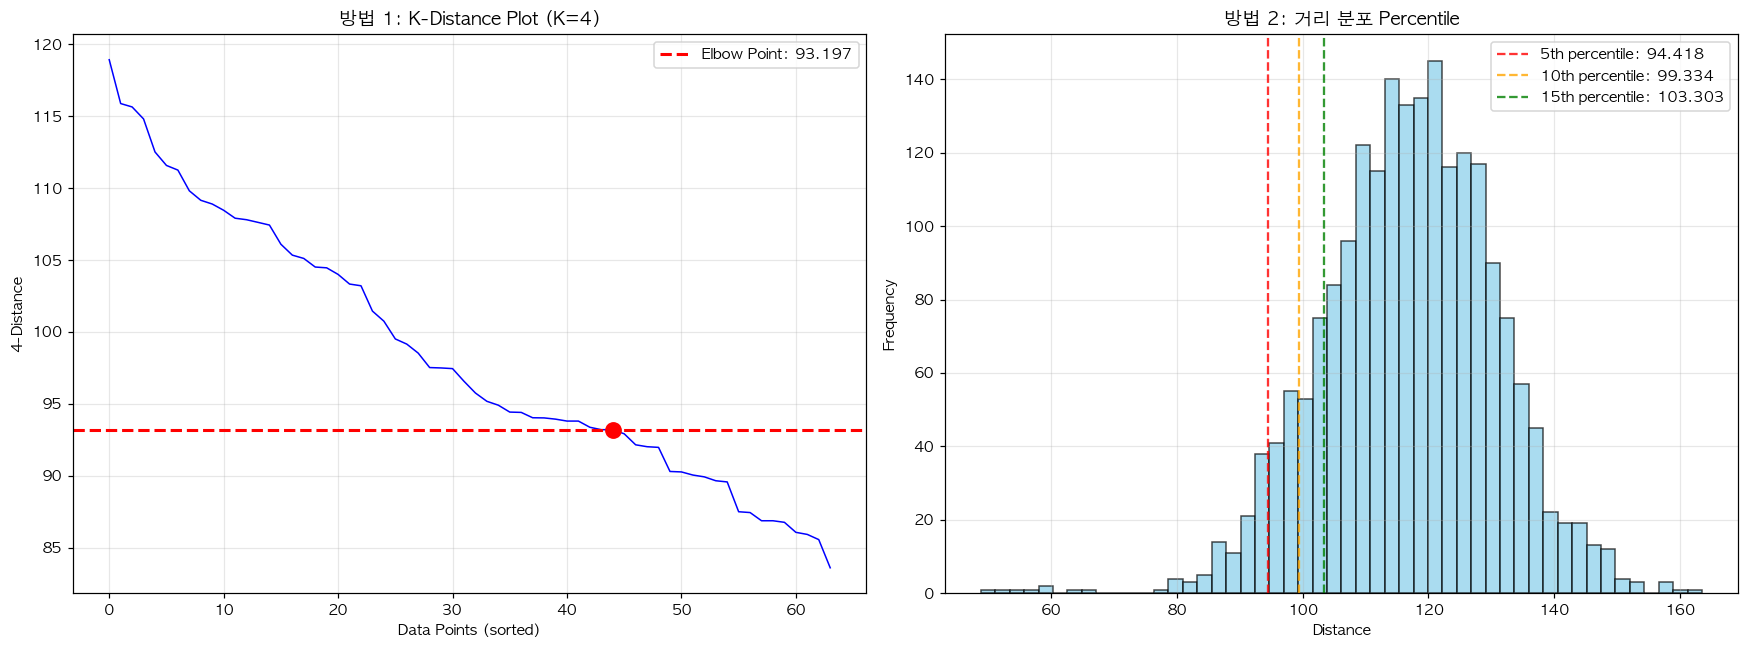

In [57]:
# ÏãúÍ∞ÅÌôî

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

## K-Distance Plot
ax1 = axes[0]
ax1.plot(range(len(k_distances)), k_distances, 'b-', linewidth=1)
ax1.axhline(y=suggested_eps_knn, color='red', linestyle='--', linewidth=2, 
           label=f'Elbow Point: {suggested_eps_knn:.3f}')
ax1.scatter([elbow_idx], [k_distances[elbow_idx]], color='red', s=100, zorder=5)
ax1.set_title(f'Î∞©Î≤ï 1: K-Distance Plot (K={k})', fontweight='bold')
ax1.set_xlabel('Data Points (sorted)')
ax1.set_ylabel(f'{k}-Distance')
ax1.legend()
ax1.grid(True, alpha=0.3)

## Í±∞Î¶¨ Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®
ax2 = axes[1]
ax2.hist(all_distances, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax2.axvline(eps_percentile_5, color='red', linestyle='--', alpha=0.8, 
           label=f'5th percentile: {eps_percentile_5:.3f}')
ax2.axvline(eps_percentile_10, color='orange', linestyle='--', alpha=0.8,
           label=f'10th percentile: {eps_percentile_10:.3f}')
ax2.axvline(eps_percentile_15, color='green', linestyle='--', alpha=0.8,
           label=f'15th percentile: {eps_percentile_15:.3f}')
ax2.set_title('Î∞©Î≤ï 2: Í±∞Î¶¨ Î∂ÑÌè¨ Percentile', fontweight='bold')
ax2.set_xlabel('Distance')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## eps Í∞íÏóê Îî∞Îùº Î™ÖÏπ≠ ÏßÄÏ†ï
recommended_eps_values = {
    'conservative': eps_percentile_5, # ÏÑ∏Î∞ÄÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌÉêÏÉâ
    'balanced': eps_percentile_10,
    'liberal': eps_percentile_15, # ÌÅ∞ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌÉêÏÉâ
    'knn_based': suggested_eps_knn # KNN Í∏∞Î∞ò Í∏∞Ï§Ä
}

In [59]:
# DBSCAN ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî©
from sklearn.cluster import DBSCAN

## ÏïûÏÑú ÏÑ§Ï†ïÌïú epsÍ∞í ÏÑ§Ï†ï
eps_knn = suggested_eps_knn
eps_percentile = eps_percentile_10

## min_samplesÏùÑ 2~5 Î≤îÏúÑÏóêÏÑú Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
parameter_combinations = [
    {'eps': eps_knn, 'min_samples': 2, 'description': 'KNN eps, min_samples=2'},
    {'eps': eps_knn, 'min_samples': 3, 'description': 'KNN eps, min_samples=3'},
    {'eps': eps_knn, 'min_samples': 4, 'description': 'KNN eps, min_samples=4'},
    {'eps': eps_knn, 'min_samples': 5, 'description': 'KNN eps, min_samples=5'},
    
    {'eps': eps_percentile, 'min_samples': 2, 'description': '10th Percentile eps, min_samples=2'},
    {'eps': eps_percentile, 'min_samples': 3, 'description': '10th Percentile eps, min_samples=3'},
    {'eps': eps_percentile, 'min_samples': 4, 'description': '10th Percentile eps, min_samples=4'},
    {'eps': eps_percentile, 'min_samples': 5, 'description': '10th Percentile eps, min_samples=5'}
]

dbscan_results = []

for i, params in enumerate(parameter_combinations, 1):
    eps = params['eps']
    min_samples = params['min_samples']
    description = params['description']
    
    # DBSCAN Ïã§Ìñâ
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(nci_scaled)
    
    # Í≤∞Í≥ºÍ∞í
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    n_noise = list(cluster_labels).count(-1)
    noise_ratio = n_noise / len(nci_scaled)
    
    # Í≤∞Í≥º Ï†ÄÏû•
    dbscan_results.append({
        'combination': i,
        'description': description,
        'eps': eps,
        'min_samples': min_samples,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'noise_ratio': noise_ratio,
        'labels': cluster_labels
    })

# Í≤∞Í≥º ÏöîÏïΩÌëú
print(f"\nüìä **ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©Î≥Ñ Í≤∞Í≥º ÏöîÏïΩ**:")
print("-" * 80)
summary_df = pd.DataFrame([
    {
        'Ï°∞Ìï©': f"{r['combination']}Î≤à",
        'eps': f"{r['eps']:.3f}",
        'min_samples': r['min_samples'],
        'ÌÅ¥Îü¨Ïä§ÌÑ∞Ïàò': r['n_clusters'],
        'ÎÖ∏Ïù¥Ï¶àÎπÑÏú®': f"{r['noise_ratio']:.1%}",
    }
    for r in dbscan_results
])
print(summary_df.to_string(index=False))


üìä **ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©Î≥Ñ Í≤∞Í≥º ÏöîÏïΩ**:
--------------------------------------------------------------------------------
Ï°∞Ìï©    eps  min_samples  ÌÅ¥Îü¨Ïä§ÌÑ∞Ïàò ÎÖ∏Ïù¥Ï¶àÎπÑÏú®
1Î≤à 93.197            2      6 32.8%
2Î≤à 93.197            3      4 39.1%
3Î≤à 93.197            4      2 48.4%
4Î≤à 93.197            5      2 51.6%
5Î≤à 99.334            2      3 21.9%
6Î≤à 99.334            3      2 25.0%
7Î≤à 99.334            4      1 29.7%
8Î≤à 99.334            5      1 29.7%


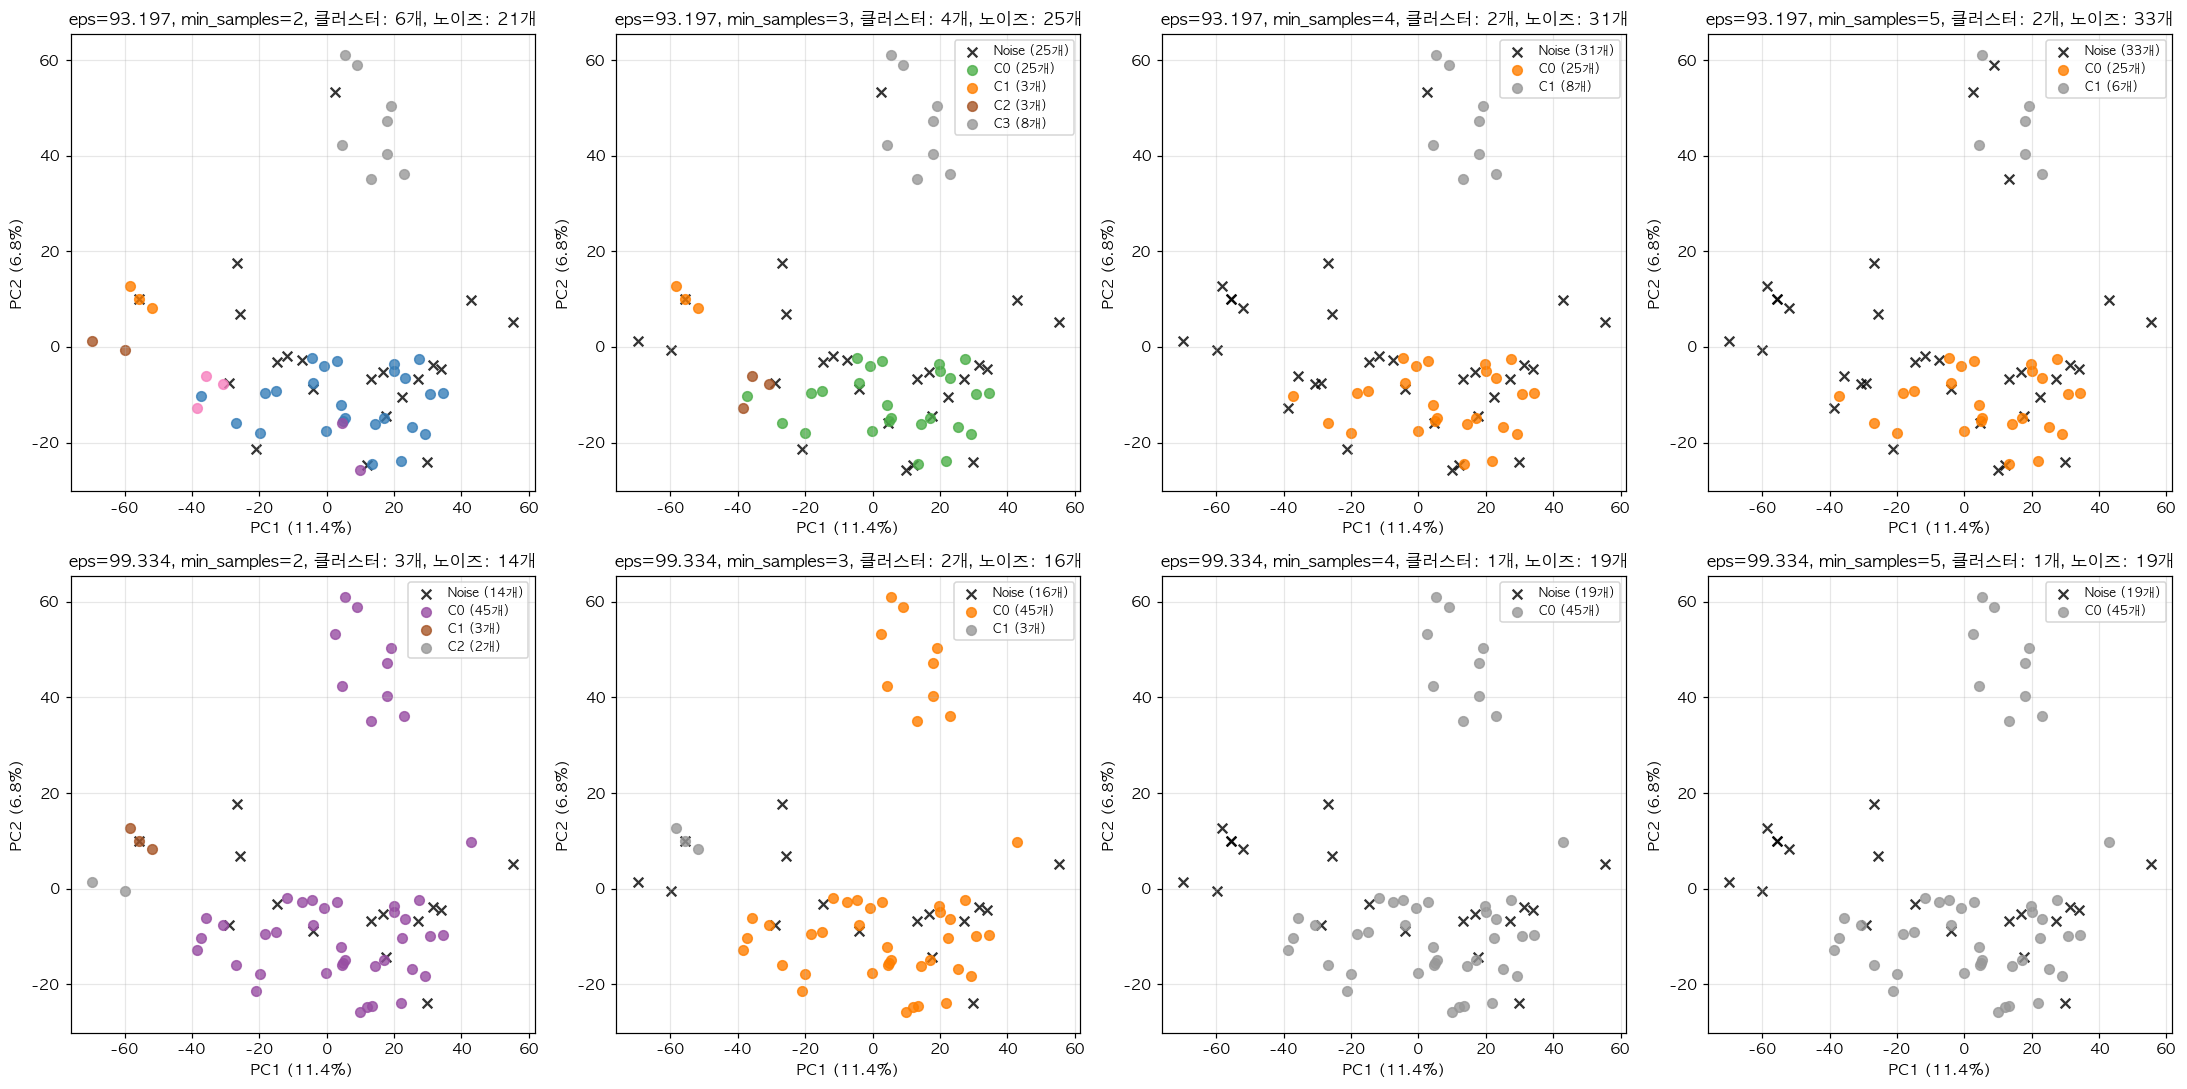

In [64]:
# DBSCAN Í≤∞Í≥º ÏãúÍ∞ÅÌôî

# PCAÎ•º Ïù¥Ïö©ÌïòÏó¨ 2Ï∞®ÏõêÏóêÏÑú ÏãúÍ∞ÅÌôî
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
nci_2d = pca.fit_transform(nci_scaled)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, result in enumerate(dbscan_results):
    ax = axes[idx]
    labels = result['labels']
    eps = result['eps']
    min_samples = result['min_samples']
    n_clusters = result['n_clusters']
    n_noise = result['n_noise']
    description = result['description']
    
    # Í≥†Ïú† ÎùºÎ≤® ÌôïÏù∏
    unique_labels = set(labels)
    n_colors = max(len(unique_labels), 1)
    colors = plt.cm.Set1(np.linspace(0, 1, n_colors))
    
    # ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú Ï†ê Í∑∏Î¶¨Í∏∞
    for k, col in zip(sorted(unique_labels), colors):
        if k == -1:
            class_member_mask = (labels == k)
            xy = nci_2d[class_member_mask]
            if len(xy) > 0:
                ax.scatter(xy[:, 0], xy[:, 1], c='black', marker='x', 
                          s=40, alpha=0.8, label=f'Noise ({len(xy)}Í∞ú)')
        else:
            class_member_mask = (labels == k)
            xy = nci_2d[class_member_mask]
            if len(xy) > 0:
                ax.scatter(xy[:, 0], xy[:, 1], c=[col], s=40, alpha=0.8, 
                          label=f'C{k} ({len(xy)}Í∞ú)')
    
    # Ï†úÎ™©Í≥º ÎùºÎ≤® ÏÑ§Ï†ï
    ax.set_title(f'eps={eps:.3f}, min_samples={min_samples}, '
                f'ÌÅ¥Îü¨Ïä§ÌÑ∞: {n_clusters}Í∞ú, ÎÖ∏Ïù¥Ï¶à: {n_noise}Í∞ú', 
                fontsize=11, fontweight='bold')
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=10)
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Î≤îÎ°Ä (ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä ÎßéÏßÄ ÏïäÏùÑ ÎïåÎßå)
    if len(unique_labels) <= 6:
        ax.legend(fontsize=8, loc='upper right')

plt.tight_layout()
plt.show()

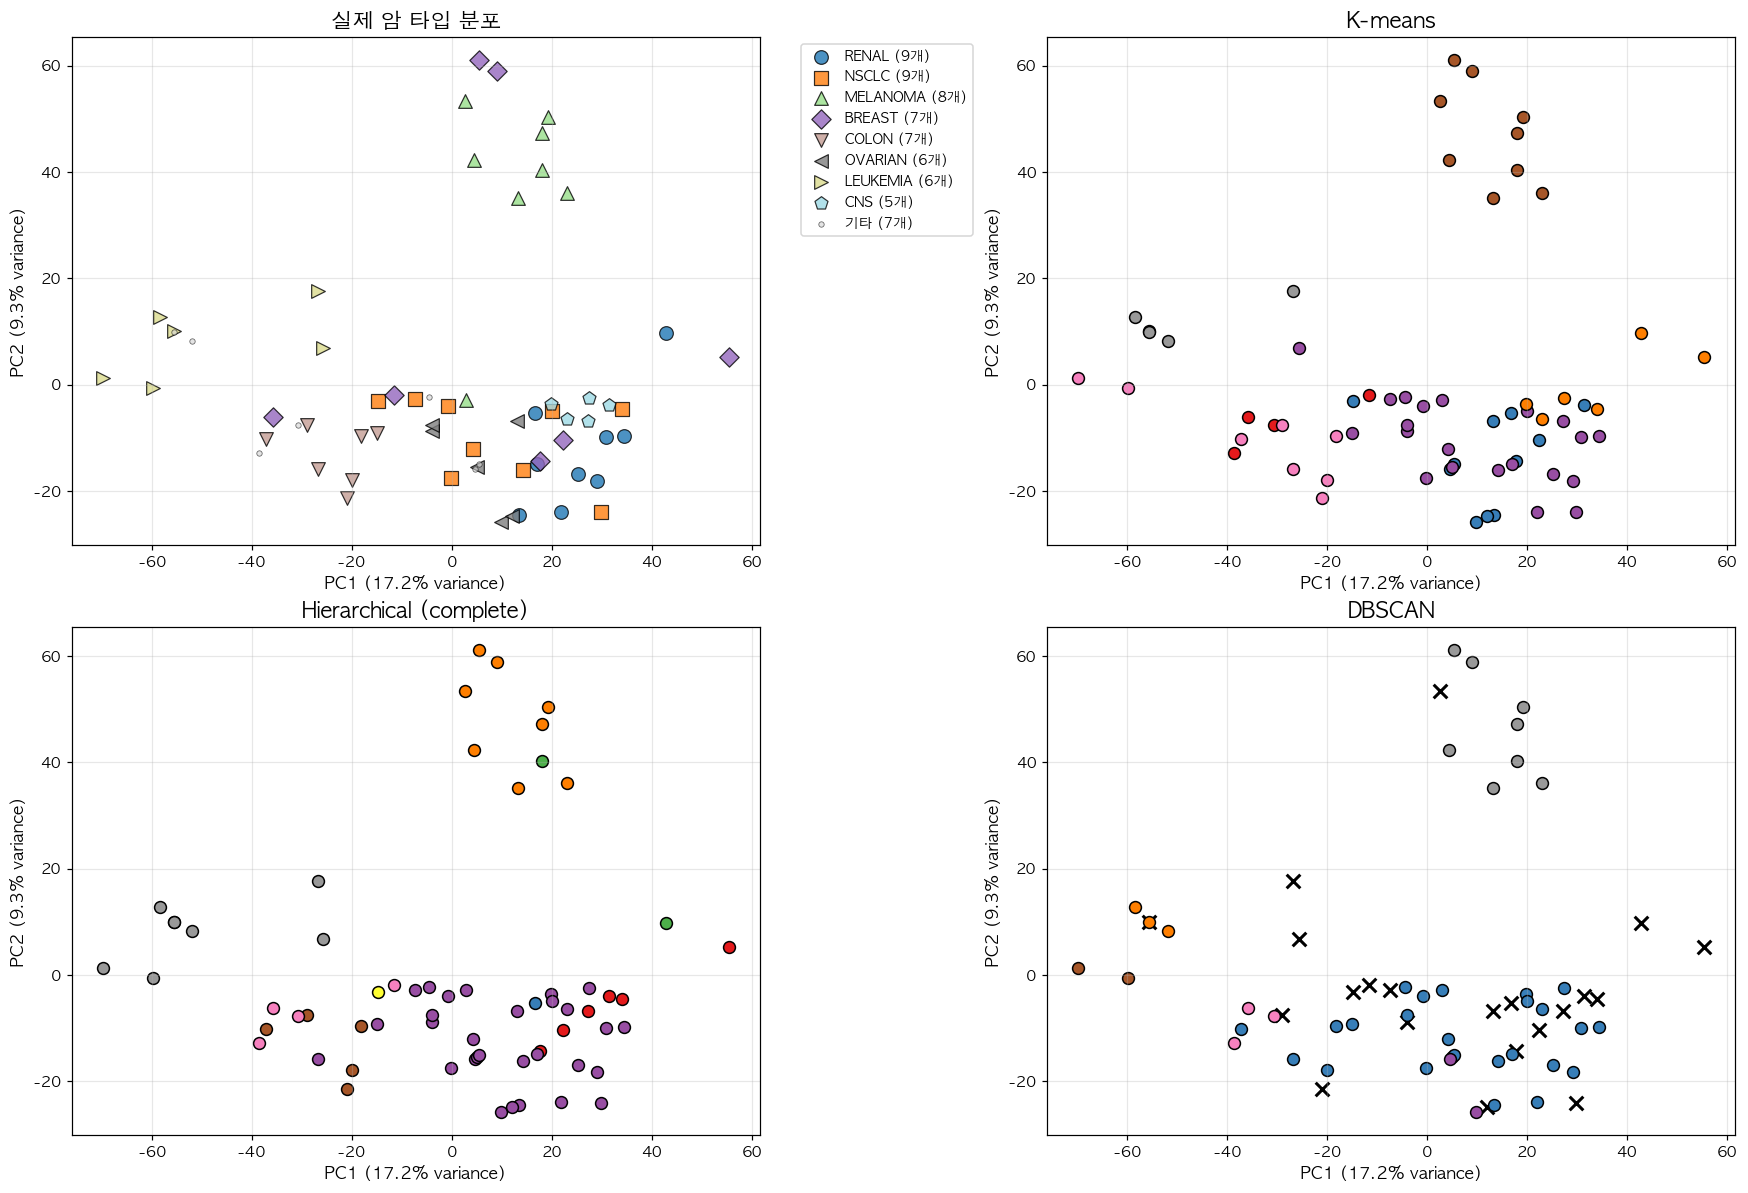

In [ ]:
# Ïã§Ï†ú Ïïî ÌÉÄÏûÖ Î∂ÑÌè¨ÏôÄ Íµ∞ÏßëÌôî Í≤∞Í≥º ÎπÑÍµê
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

## ÎπÑÍµêÌï† Ï£ºÏöî Íµ∞ÏßëÌôî Î∞©Î≤ïÎì§
methods_to_compare = ['K-means', 'Hierarchical (complete)', 'DBSCAN']

## Ï£ºÏöî Ïïî ÌÉÄÏûÖÎì§ ÏãùÎ≥Ñ (ÏÉòÌîå ÏàòÍ∞Ä ÎßéÏùÄ ÏÉÅÏúÑ ÌÉÄÏûÖÎì§)
cancer_type_counts = pd.Series(nci_labels).value_counts()
major_cancer_types = cancer_type_counts.head(8).index.tolist()
ax = axes[0]
colors_cancer = plt.cm.tab20(np.linspace(0, 1, len(major_cancer_types)))
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']

for i, cancer_type in enumerate(major_cancer_types):
    mask = np.array(nci_labels) == cancer_type
    if np.any(mask):
        ax.scatter(nci_2d[mask, 0], nci_2d[mask, 1], 
                    c=[colors_cancer[i]], alpha=0.8, s=80,
                    marker=markers[i % len(markers)],
                    label=f'{cancer_type} ({np.sum(mask)}Í∞ú)',
                    edgecolors='black', linewidth=0.8)

## Í∏∞ÌÉÄ Ïïî ÌÉÄÏûÖ
other_mask = ~np.isin(nci_labels, major_cancer_types)
if np.any(other_mask):
    ax.scatter(nci_2d[other_mask, 0], nci_2d[other_mask, 1], 
                c='lightgray', alpha=0.6, s=50, marker='.',
                label=f'Í∏∞ÌÉÄ ({np.sum(other_mask)}Í∞ú)',
                edgecolors='black', linewidth=0.5)

ax.set_title('Ïã§Ï†ú Ïïî ÌÉÄÏûÖ Î∂ÑÌè¨', fontweight='bold', fontsize=14)
ax.set_xlabel('PC1 (17.2% variance)', fontsize=11)
ax.set_ylabel('PC2 (9.3% variance)', fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

## ÎÇòÎ®∏ÏßÄ: Í∞Å Íµ∞ÏßëÌôî Î∞©Î≤ïÎ≥Ñ Í≤∞Í≥º
method_labels_dict = {
    'K-means': labels_gap, # Í∞≠ ÌÜµÍ≥ÑÎüâ Í∏∞Î∞ò K-means
    'Hierarchical (complete)': labels_complete, # Complete linkage
    'DBSCAN': dbscan_results[0]['labels'] # DBSCAN (eps=0.932, min_samples=2)
}

for idx, method_name in enumerate(methods_to_compare):
    if method_name in method_labels_dict:
        ax = axes[idx + 1]
        labels = method_labels_dict[method_name]
        
        unique_clusters = np.unique(labels)
        cluster_colors = plt.cm.Set1(np.linspace(0, 1, len(unique_clusters)))
        
        for j, cluster_val in enumerate(unique_clusters):
            mask = labels == cluster_val
            if method_name == 'DBSCAN' and cluster_val == -1:
                ax.scatter(nci_2d[mask, 0], nci_2d[mask, 1], 
                            c='black', marker='x', s=80, alpha=1,
                            label=f'ÎÖ∏Ïù¥Ï¶à ({np.sum(mask)}Í∞ú)', linewidth=2)
            else:
                ax.scatter(nci_2d[mask, 0], nci_2d[mask, 1], 
                            c=[cluster_colors[j]], alpha=1, s=60,
                            label=f'ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_val} ({np.sum(mask)}Í∞ú)',
                            edgecolors='black', linewidth=1)
        
        ax.set_title(f'{method_name}', 
                    fontweight='bold', fontsize=14)
        ax.set_xlabel('PC1 (17.2% variance)', fontsize=11)
        ax.set_ylabel('PC2 (9.3% variance)', fontsize=11)
        ax.grid(True, alpha=0.3)
        
        if len(unique_clusters) <= 6:
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

ÏÉùÍ∞ÅÌï¥Î≥º Î¨∏Ï†ú  

(1) Íµ∞ÏßëÎ∂ÑÏÑùÏùò Í≤∞Í≥ºÍ∞Ä Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±ÏùÑ Ïñ¥Îäê Ï†ïÎèÑÍπåÏßÄ Î∂ÑÎ¶¨ÏãúÌÇ¨ Ïàò ÏûàÏóàÎäîÍ∞Ä?  

(2) Í∞Å Í∏∞Î≤ïÏóêÏÑú Ï¥àÎ™®ÏàòÏùò Î≥ÄÌôîÏóê Îî∞Îùº Íµ∞ÏßëÎ∂ÑÏÑùÏùò Í≤∞Í≥ºÍ∞Ä Ïñ¥ÎñªÍ≤å Îã¨ÎùºÏßÄÎäîÍ∞Ä?  

(3) Í∞ÅÍ∞ÅÏùò Íµ∞ÏßëÎ∂ÑÏÑù Í∏∞Î≤ïÏùò Íµ∞ÏßëÌôî Í≤∞Í≥ºÎ•º ÎπÑÍµêÌñàÏùÑ ÎïåÏóê Î¨¥ÏóáÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Íµ∞ÏßëÌôîÏùò Í≤∞Í≥ºÎ•º ÌèâÍ∞ÄÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùÑÍπå?  

(4) Íµ∞ÏßëÎ∂ÑÏÑùÏùÑ ÏßÑÌñâÌïòÎäî Í≥ºÏ†ï, Í≤∞Í≥ºÎ•º ÌôïÏù∏ÌïòÎäî Í≥ºÏ†ïÏóêÏÑú Íµ∞ÏßëÎ∂ÑÏÑù Ïù¥Ïô∏Ïóê Ïñ¥Îñ§ Î∂ÑÏÑùÍ∏∞Î≤ïÏù¥ÎÇò Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÍ≥º Í¥ÄÎ†®Îêú ÏßÄÏãùÏùÑ ÎèôÏõêÌñàÎäîÍ∞Ä?